# Preliminary exploratory data analysis
### Loading Data and Dependencies

In [207]:
# import all dependencies
library(tidyverse)
library(tidymodels)
library(repr)

# library(ggplot2)
# library(dplyr)
# library(patchwork)

options(repr.matrix.max.rows = 6)

# create data dir and download csv into it
url <- "https://raw.githubusercontent.com/21chanas3/dsci100-group73/c9c58b88eca13be20286f8bf70dce4668b878247/data/healthcare-dataset-stroke-data.csv"
if (!dir.exists("data")) {
    dir.create("data") }
download.file(url, "data/stroke.csv")

stroke <- read_csv("data/stroke.csv")
stroke

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### Cleaning and Wrangling

In [208]:
# rename columns to all lowercase
stroke_colnames <- stroke |> colnames() |> make.names() |> tolower()
colnames(stroke) <- stroke_colnames

# convert unknowns to NA
stroke <- stroke |> na_if("Unknown")

# convert categorical vars to factors
stroke <- stroke |> mutate(gender = as_factor(gender), 
                 work_type = as_factor(work_type), 
                 residence_type = as_factor(residence_type), 
                 smoking_status = as_factor(smoking_status),
                 hypertension = as_factor(hypertension),
                 ever_married = as_factor(ever_married),
                 heart_disease = as_factor(heart_disease),
                 stroke = as_factor(stroke))

# rename factor levels to nicer names
stroke$hypertension <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$heart_disease <- recode_factor(stroke$heart_disease, "0" = "No", "1" = "Yes")
stroke$stroke <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$work_type <- recode_factor(stroke$work_type, "Govt_job" = "Government", "Never_worked" = "Never Worked")
stroke$smoking_status <- recode_factor(stroke$smoking_status, "formerly smoked" = "Formerly", "never smoked" = "Never", "smokes" = "Smokes")

# for some reason bmi is of type char probably because of N/A, converting to double here
stroke <- stroke |> mutate(bmi = as.numeric(as.character(bmi)))

# # drop variables/columns that we are not using to train - see Methodology section for more details
# stroke <- stroke |> subset(select = -c(id, ever_married,work_type))

stroke

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
9046,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,Formerly,No
51676,Female,61,No,No,Yes,Self-employed,Rural,202.21,NA,Never,No
31112,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,Never,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
19723,Female,35,No,No,Yes,Self-employed,Rural,82.99,30.6,Never,No
37544,Male,51,No,No,Yes,Private,Rural,166.29,25.6,Formerly,No
44679,Female,44,No,No,Yes,Government,Urban,85.28,26.2,NA,No


# Preliminary analysis

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 201 rows containing no

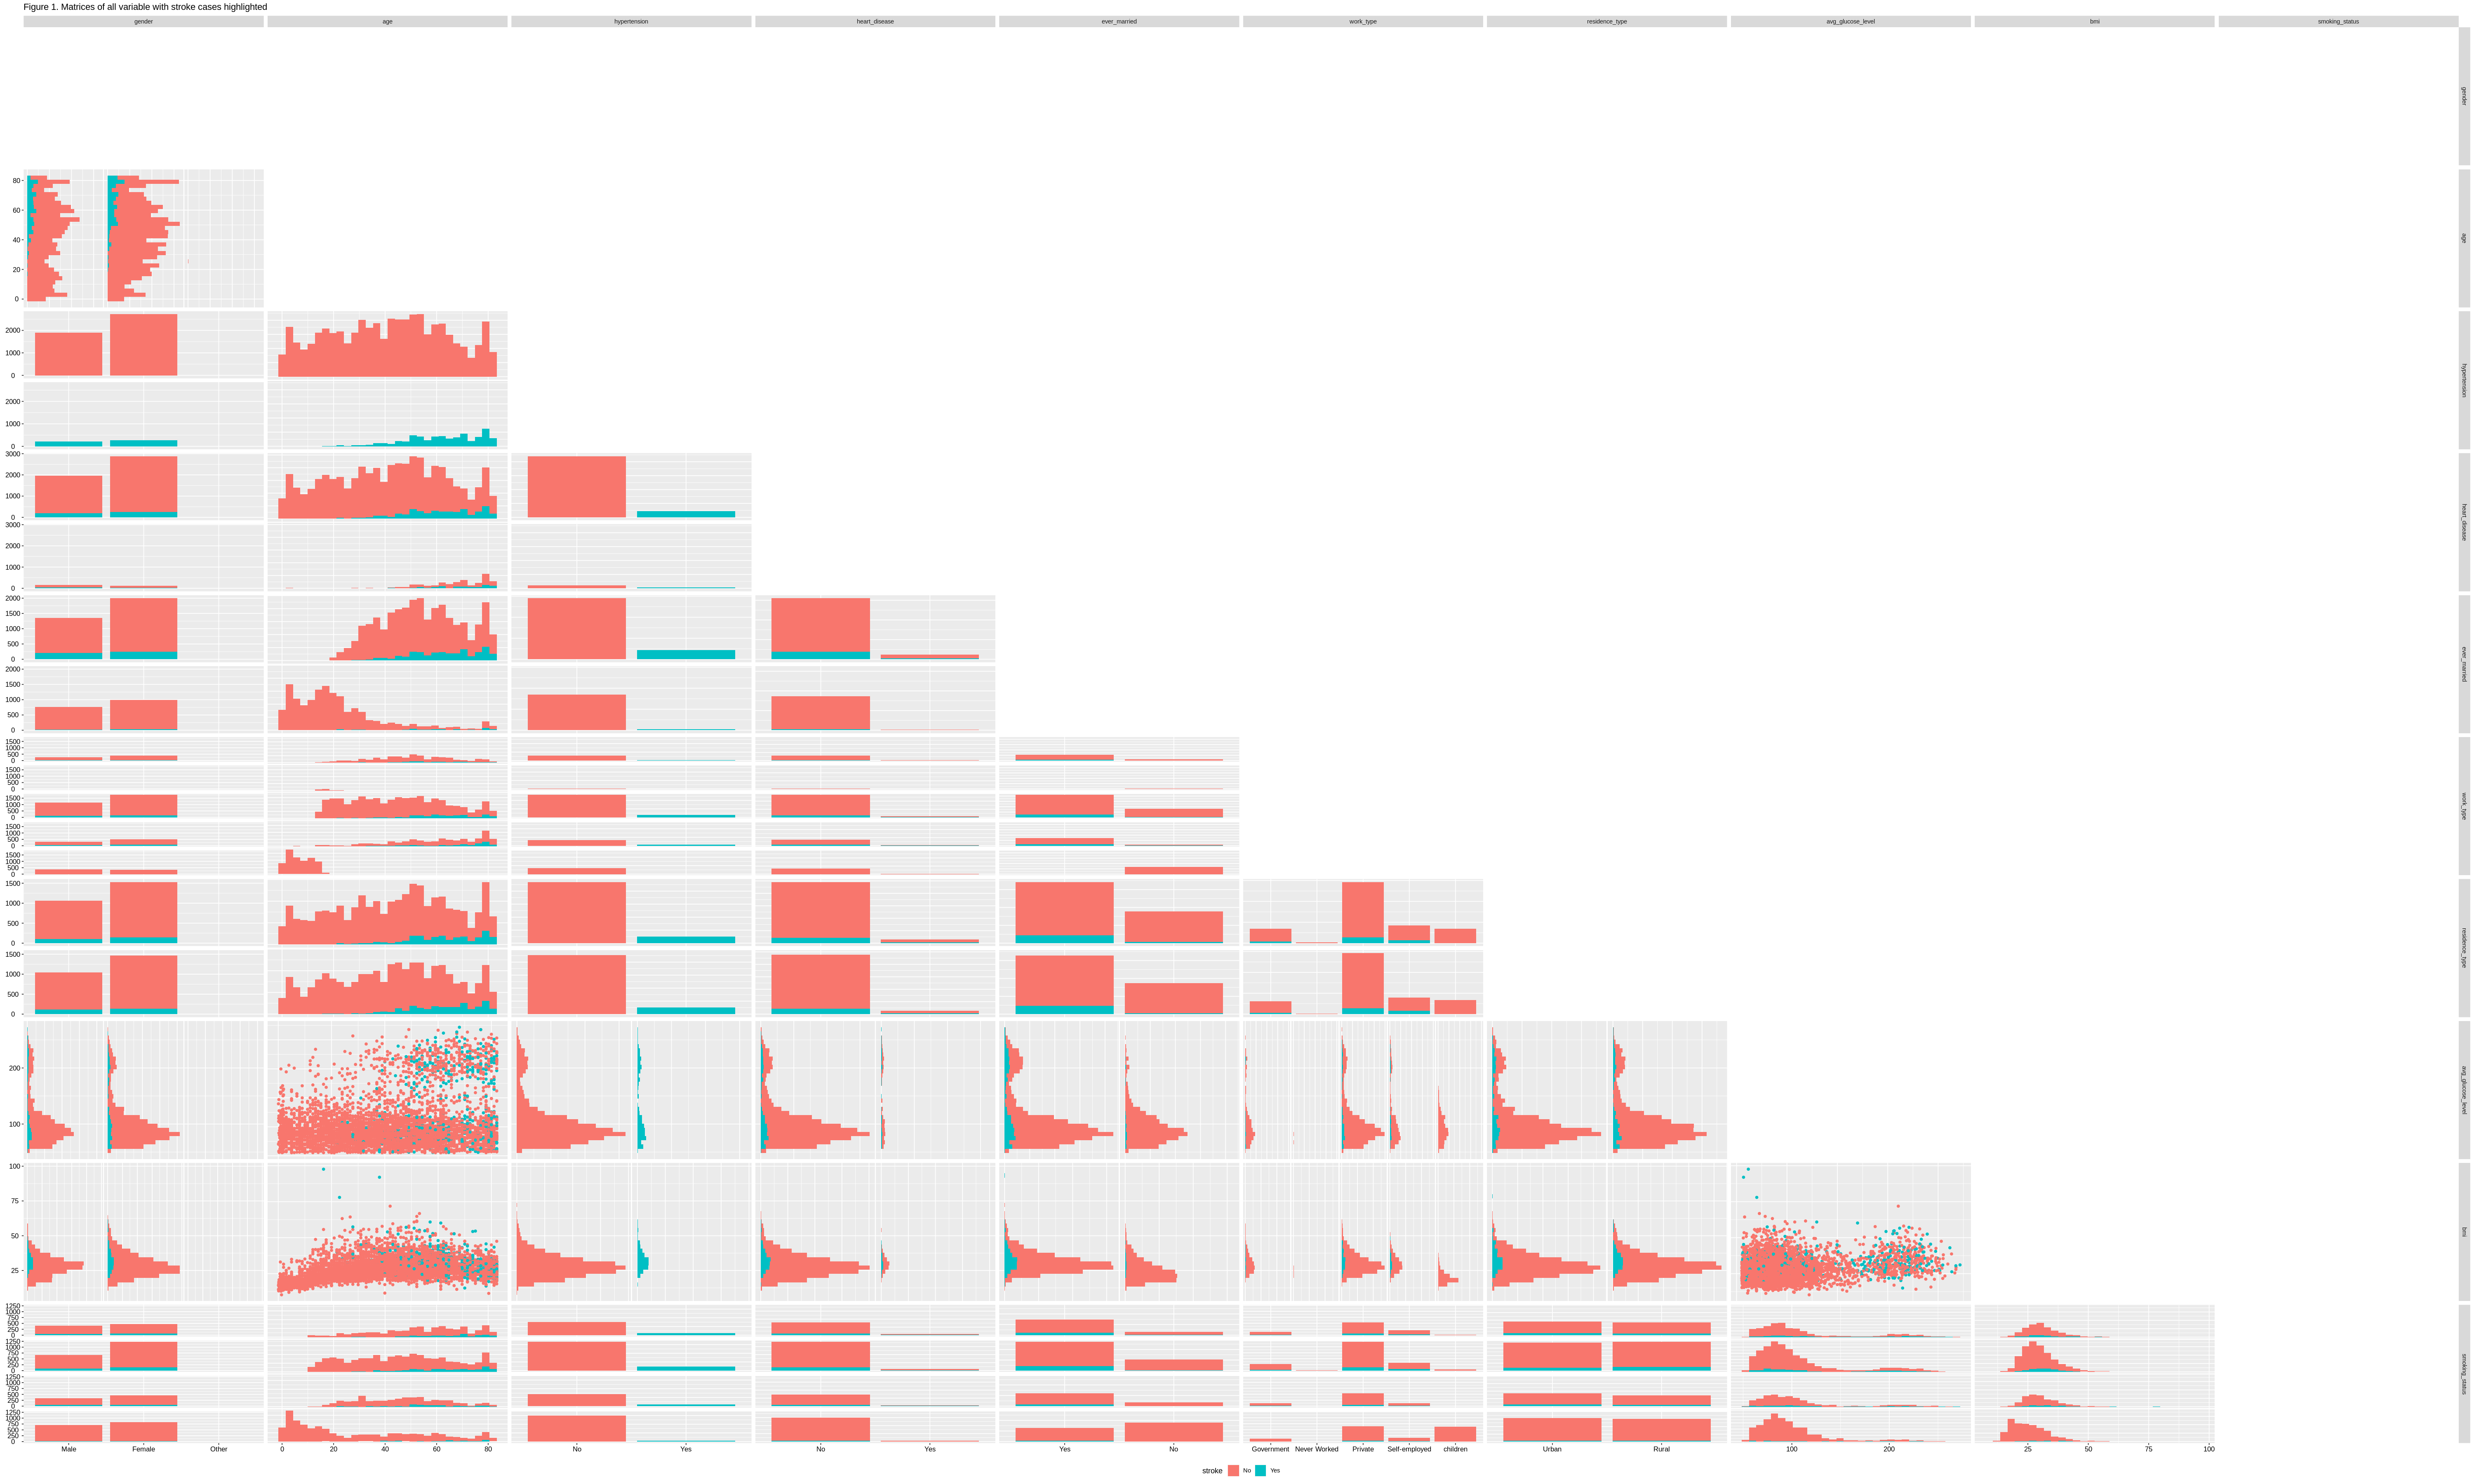

In [286]:
library(GGally)
options(repr.plot.width = 50, repr.plot.height = 30) 

plot_pairs <- stroke %>%   
  ggpairs(legend=11,
          columns=2:11,
          mapping = ggplot2::aes(color = stroke),
          upper="blank",
          diag = NULL)+

          labs(color="Verification")+

          ggtitle("Figure 1. Matrices of all variable with stroke cases highlighted") +

          theme(plot.title = element_text(hjust = 0),
                axis.text.x = element_text(hjust = .5, color = "black", size=10),
                axis.text.y = element_text(hjust = .5, color = "black",size=10),
                legend.position = "bottom")
        　 
plot_pairs


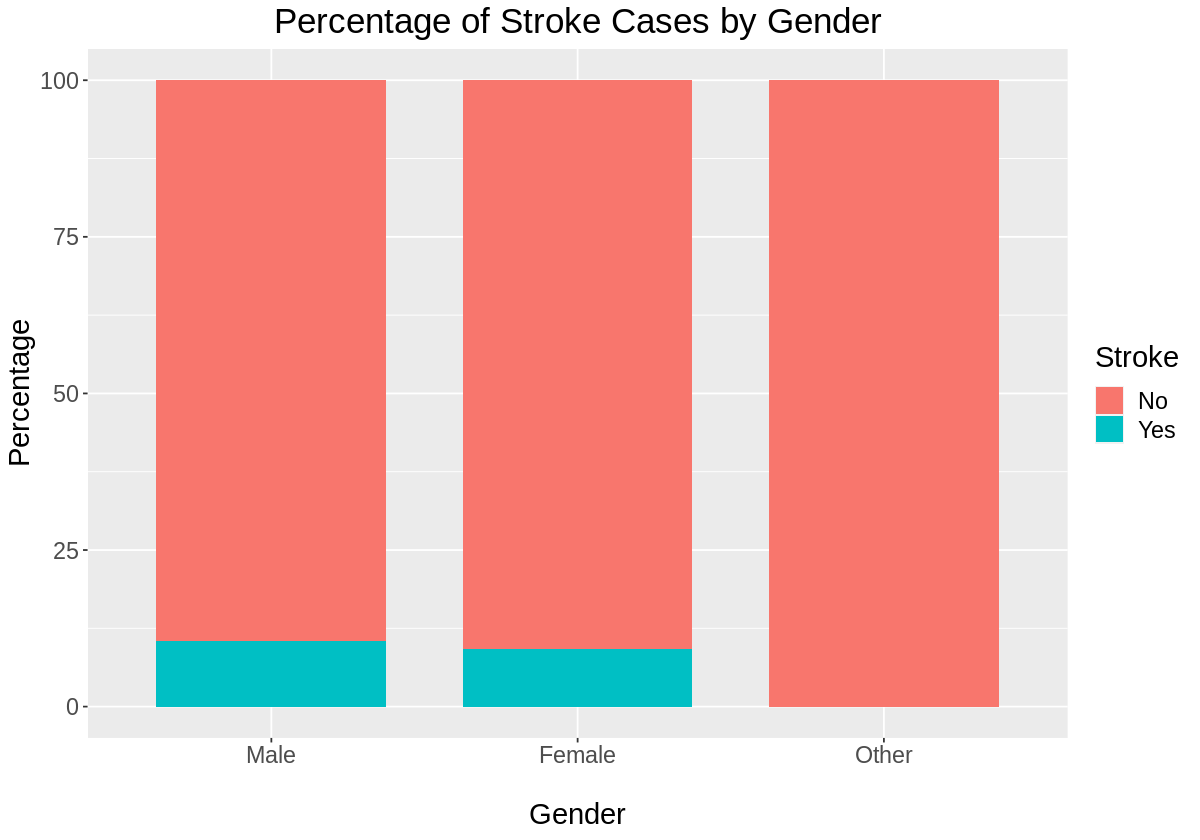

In [233]:
stroke_age <- stroke %>%
  count(gender, stroke) %>%
  group_by(gender) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = gender, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nGender", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Gender") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_age

Warning message:
“position_stack requires non-overlapping x intervals”


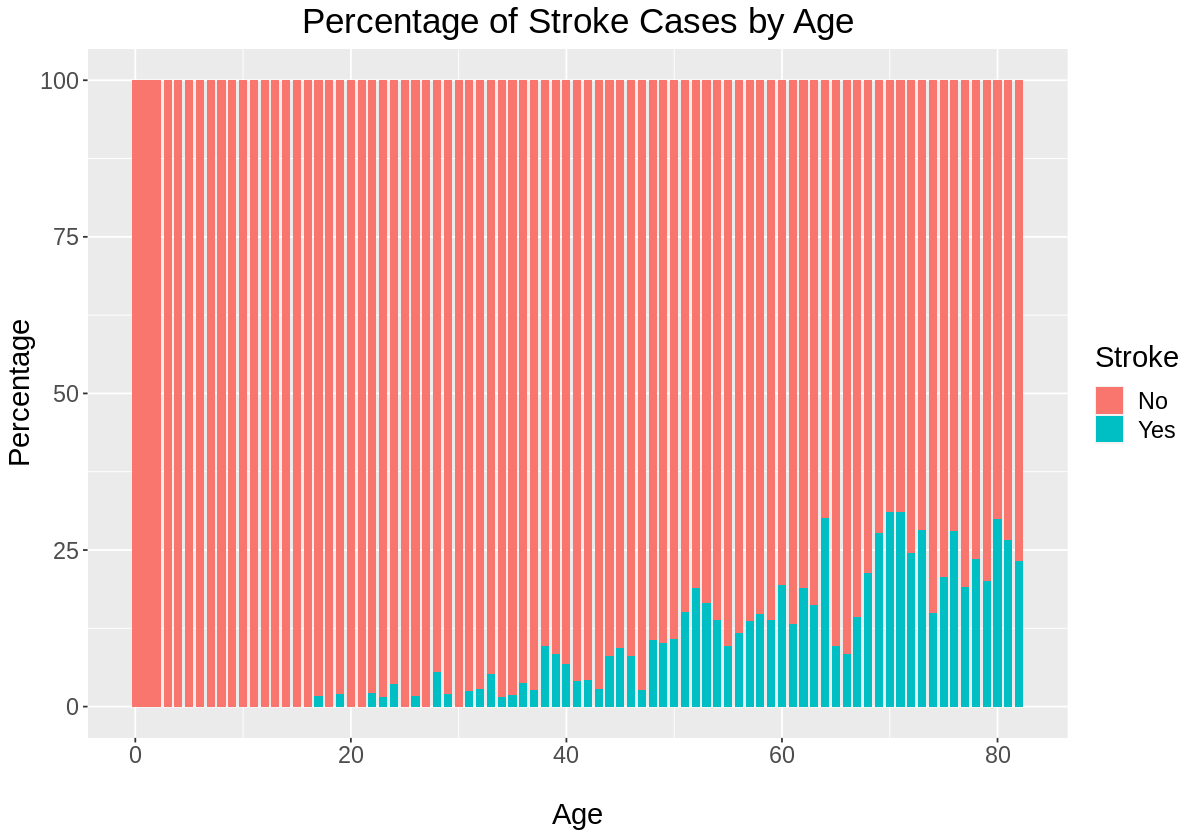

In [230]:
stroke_age <- stroke %>%
  count(age, stroke) %>%
  group_by(age) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = age, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nAge", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Age") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_age

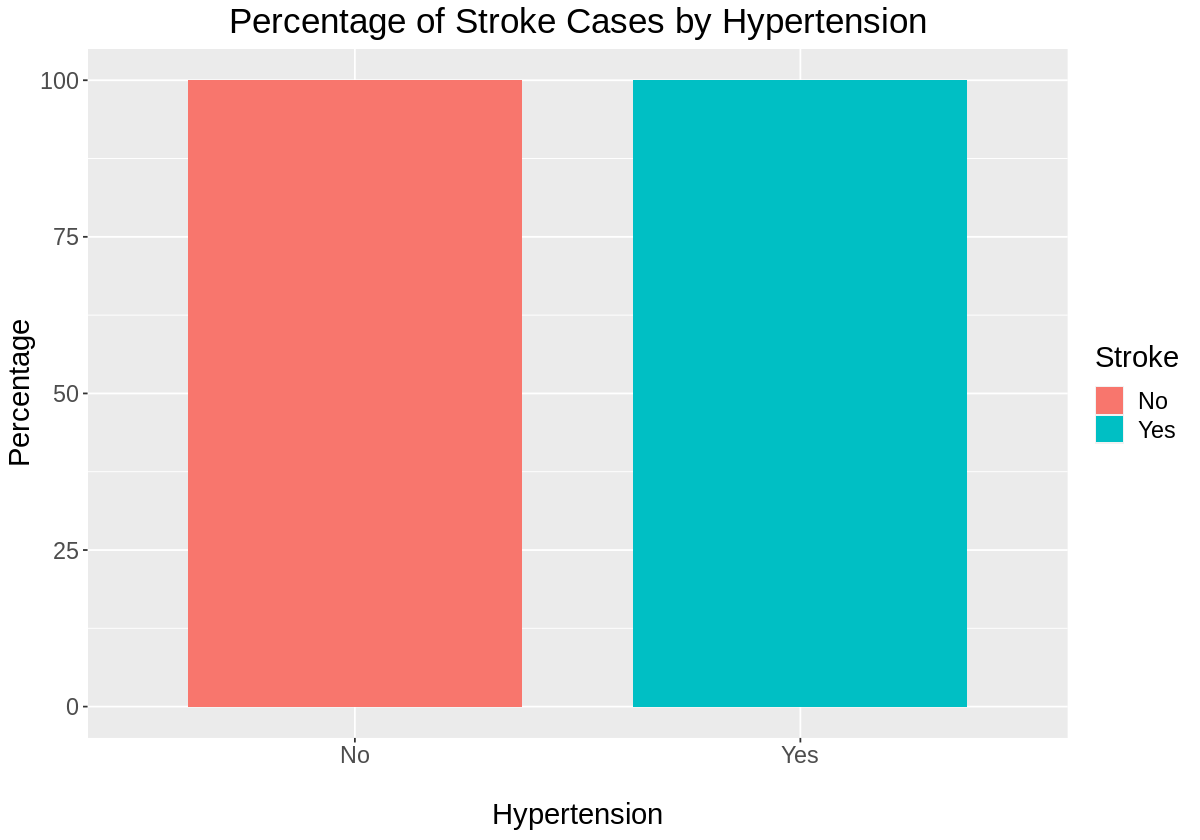

In [229]:
stroke_hypertension <- stroke %>%
  count(hypertension, stroke) %>%
  group_by(hypertension) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = hypertension, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nHypertension", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Hypertension") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_hypertension


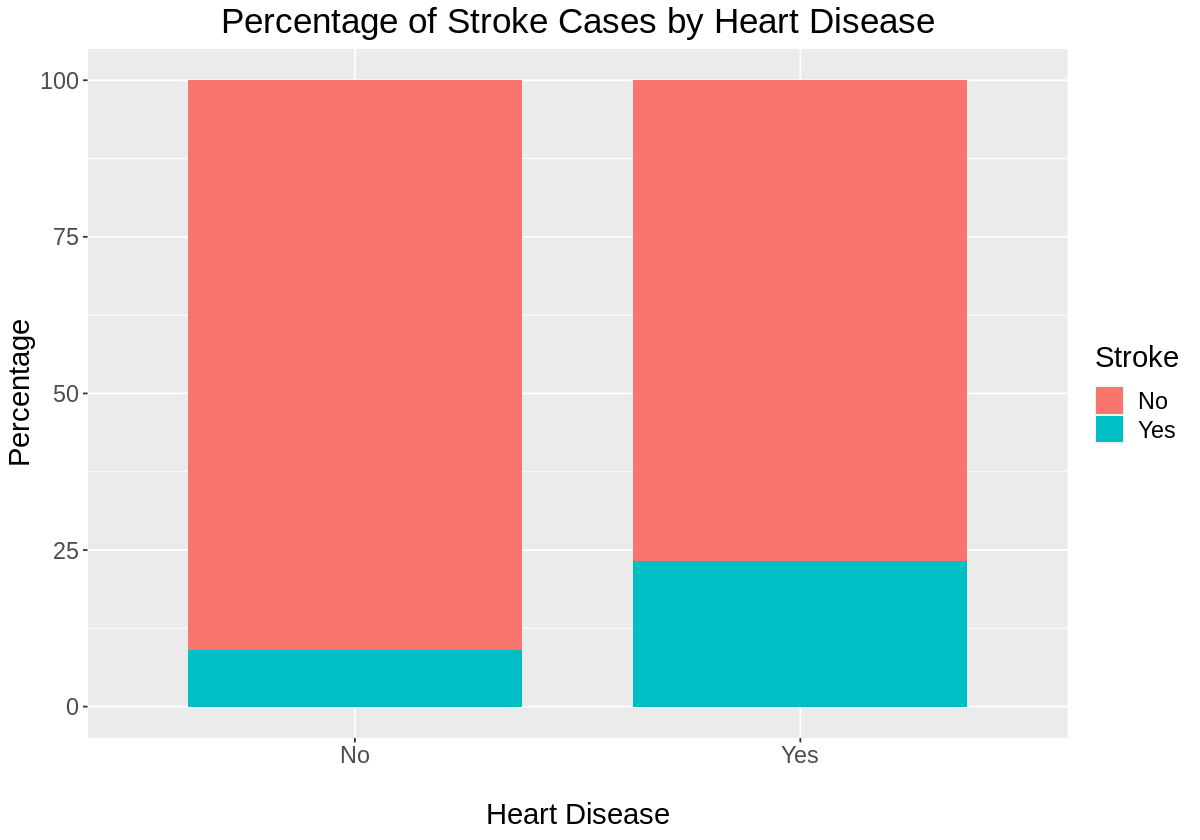

In [228]:
stroke_heart_disease <- stroke %>%
  count(heart_disease, stroke) %>%
  group_by(heart_disease) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = heart_disease, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nHeart Disease", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Heart Disease") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_heart_disease

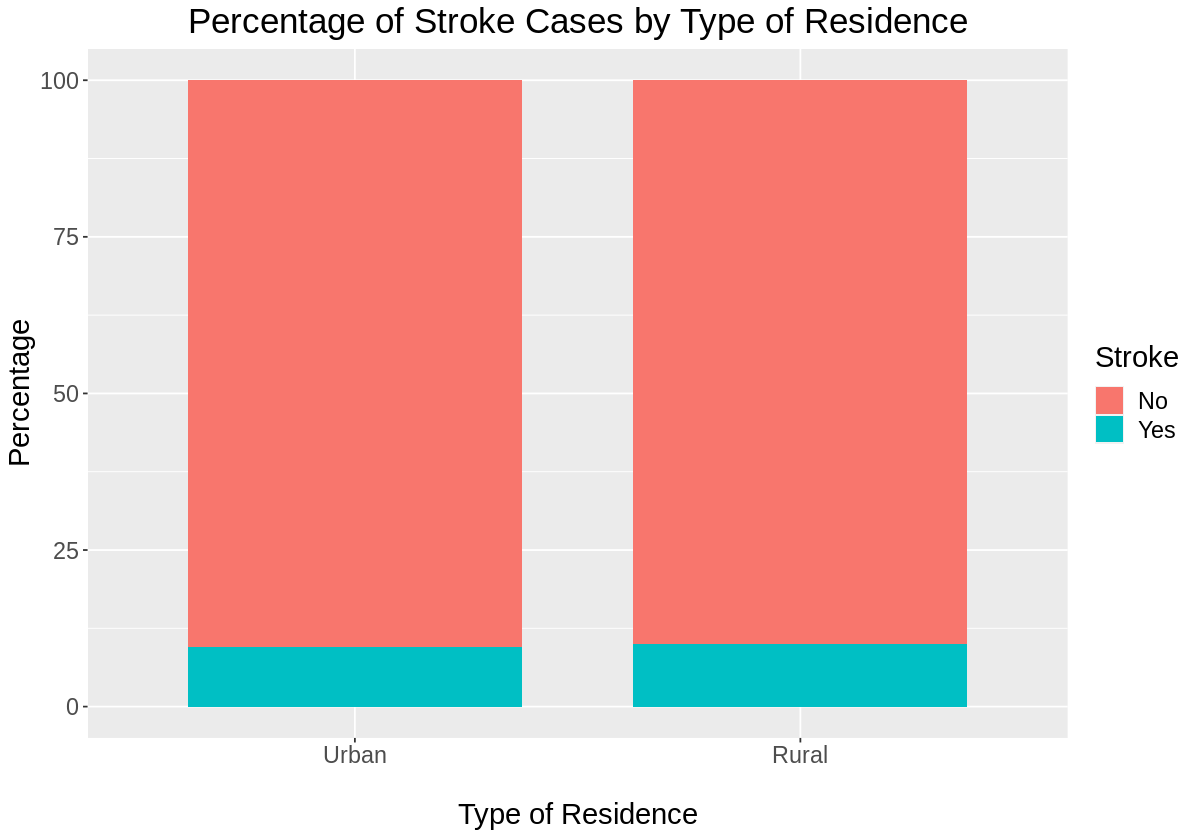

In [227]:
stroke_residence <- stroke %>%
  count(residence_type, stroke) %>%
  group_by(residence_type) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = residence_type, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nType of Residence", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Type of Residence") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_residence

Warning message:
“position_stack requires non-overlapping x intervals”


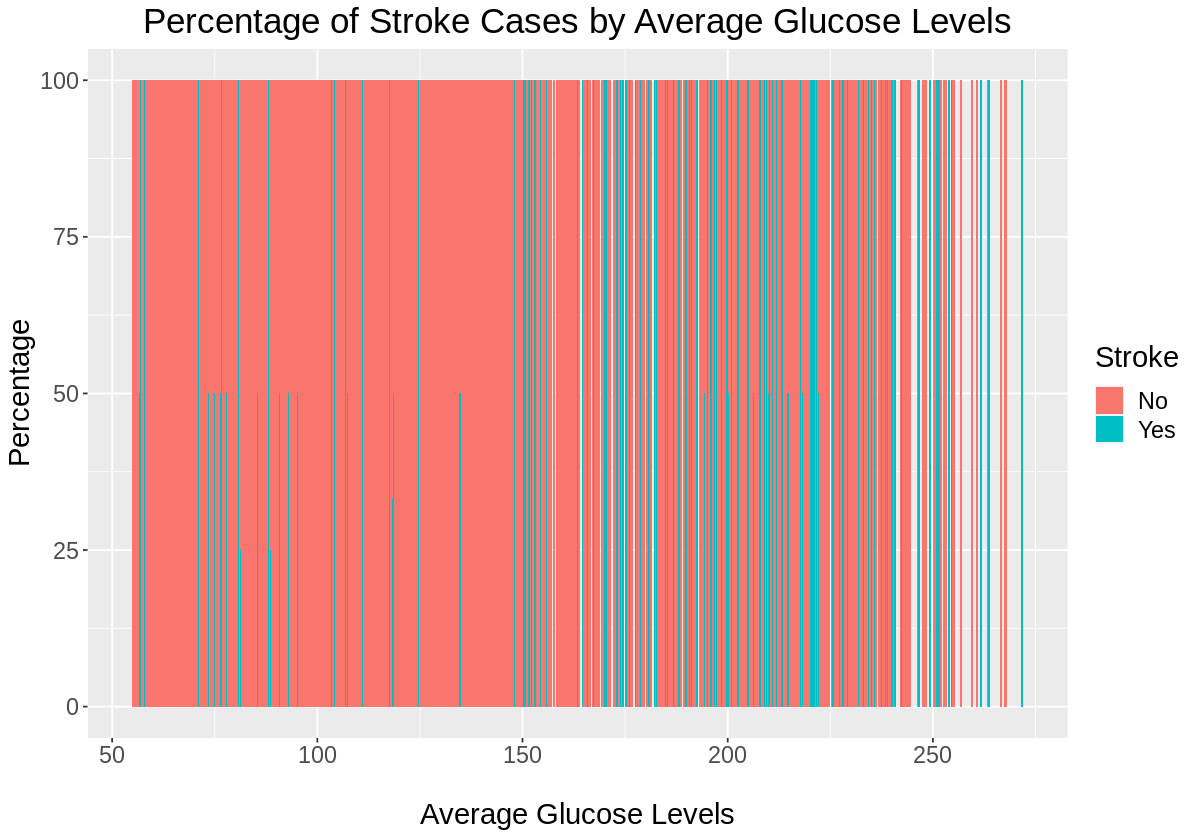

In [225]:
stroke_avg_glucose_level <- stroke %>%
  count(avg_glucose_level, stroke) %>%
  group_by(avg_glucose_level) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = avg_glucose_level, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .5) +
  labs(x = "\nAverage Glucose Levels", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Average Glucose Levels") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_avg_glucose_level


Warning message:
“Removed 2 rows containing missing values (position_stack).”
Warning message:
“position_stack requires non-overlapping x intervals”


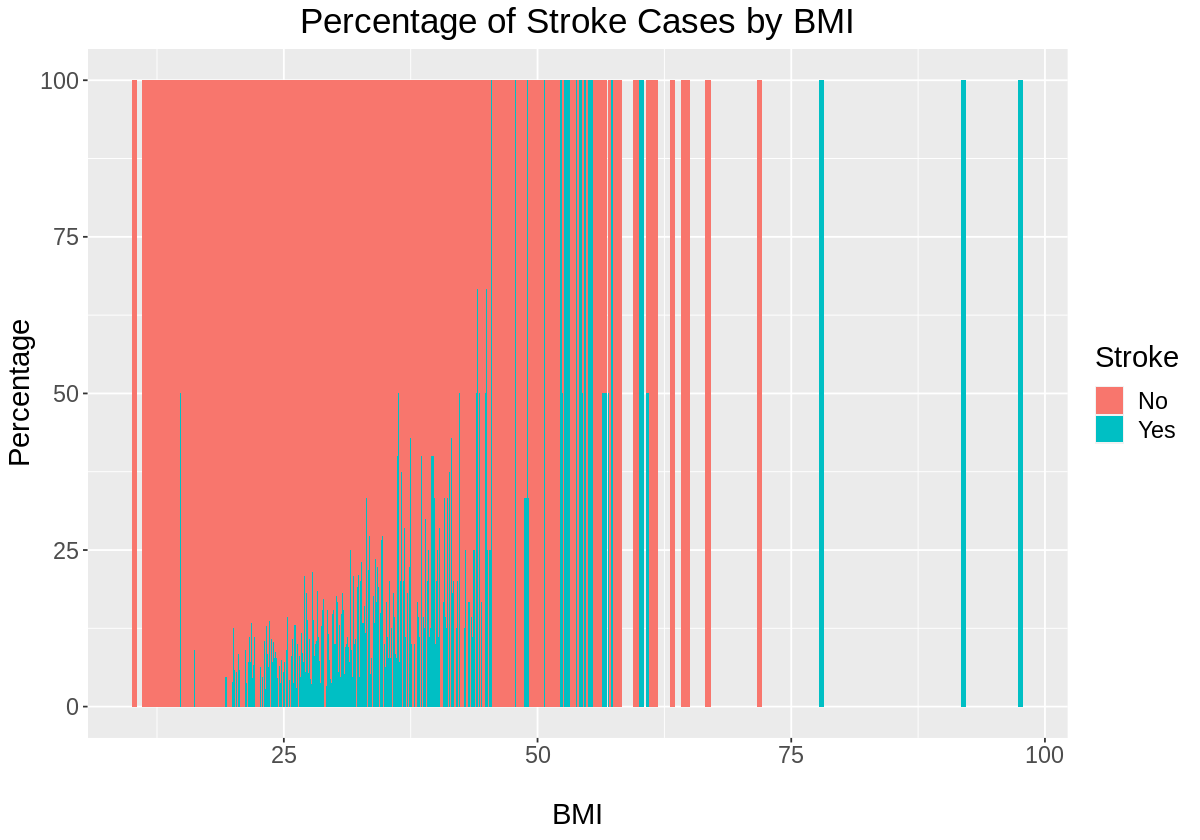

In [224]:
stroke_bmi <- stroke %>%
  count(bmi, stroke) %>%
  group_by(bmi) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = bmi, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .5) +
  labs(x = "\nBMI", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by BMI") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_bmi


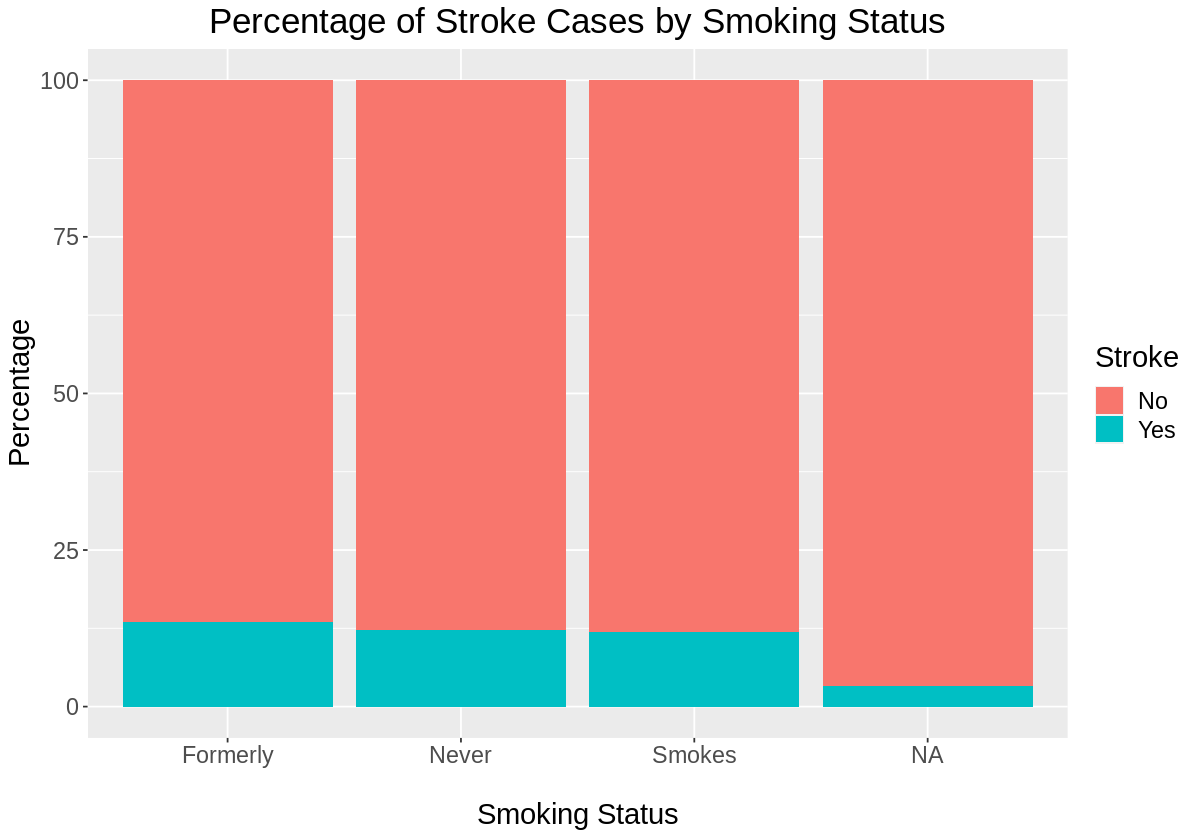

In [222]:
stroke_smoking_status <- stroke %>%
  count(smoking_status, stroke) %>%
  group_by(smoking_status) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = smoking_status, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity") +
  labs(x = "\nSmoking Status", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Smoking Status") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_smoking_status

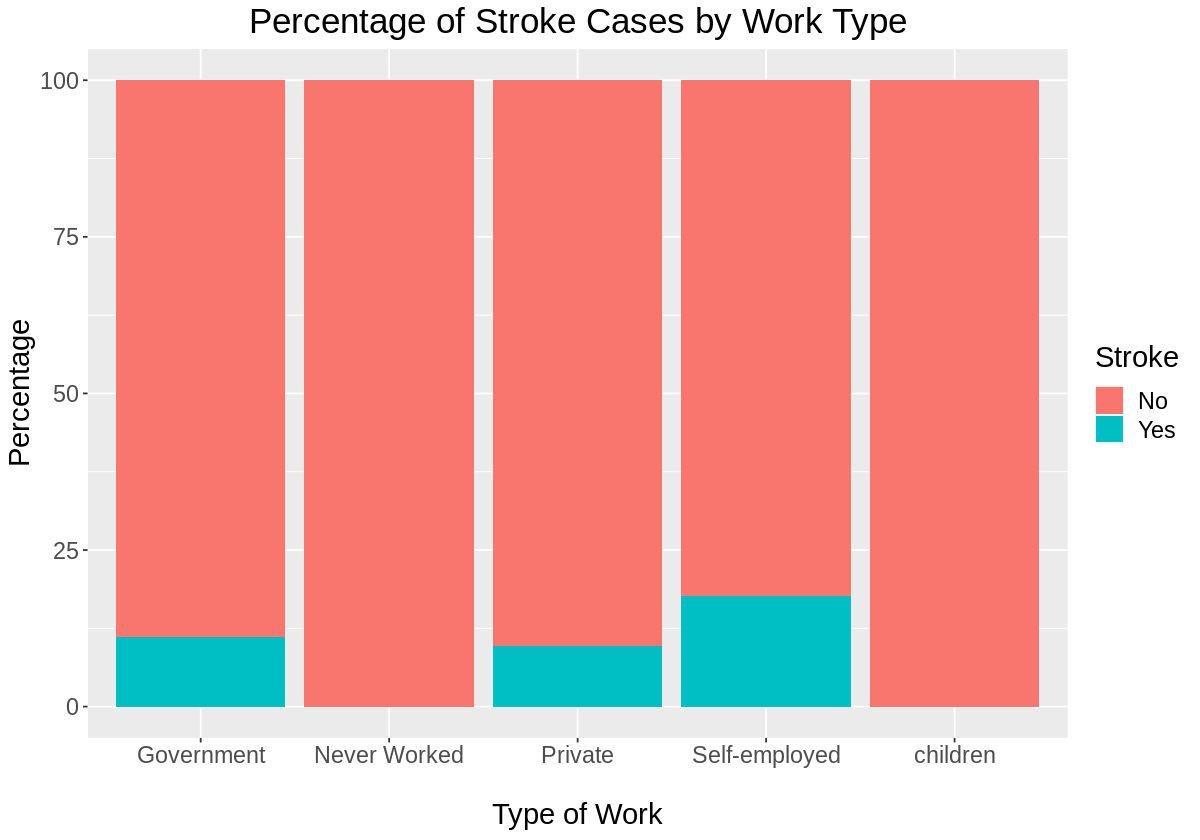

In [219]:
stroke_worktype_plot <- stroke |>
  count(work_type, stroke) |>
  group_by(work_type) |>
  mutate(percentage = n / sum(n) * 100) |>
  ggplot(aes(x = work_type, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity") +
  labs(x = "\nType of Work", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Work Type") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_worktype_plot

# Further Analysis

Warning message:
“position_stack requires non-overlapping x intervals”


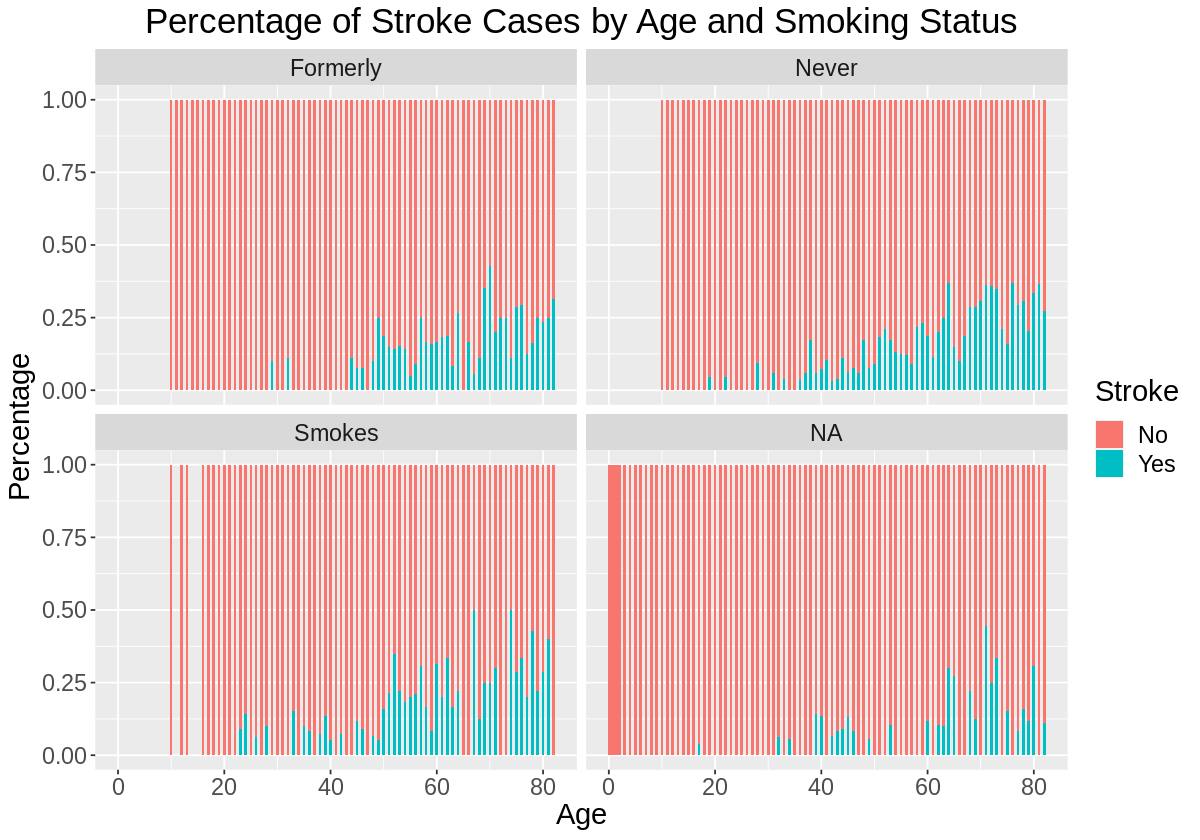

In [244]:
stroke_age_smoking <- stroke %>%
  ggplot(aes(x = age, fill = stroke)) +
  geom_bar(aes(y = ..count.. / sum(..count..)), position = "fill", width = .5) +
  facet_wrap(~ smoking_status) +
  labs(x = "Age", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Age and Smoking Status") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))

stroke_age_smoking

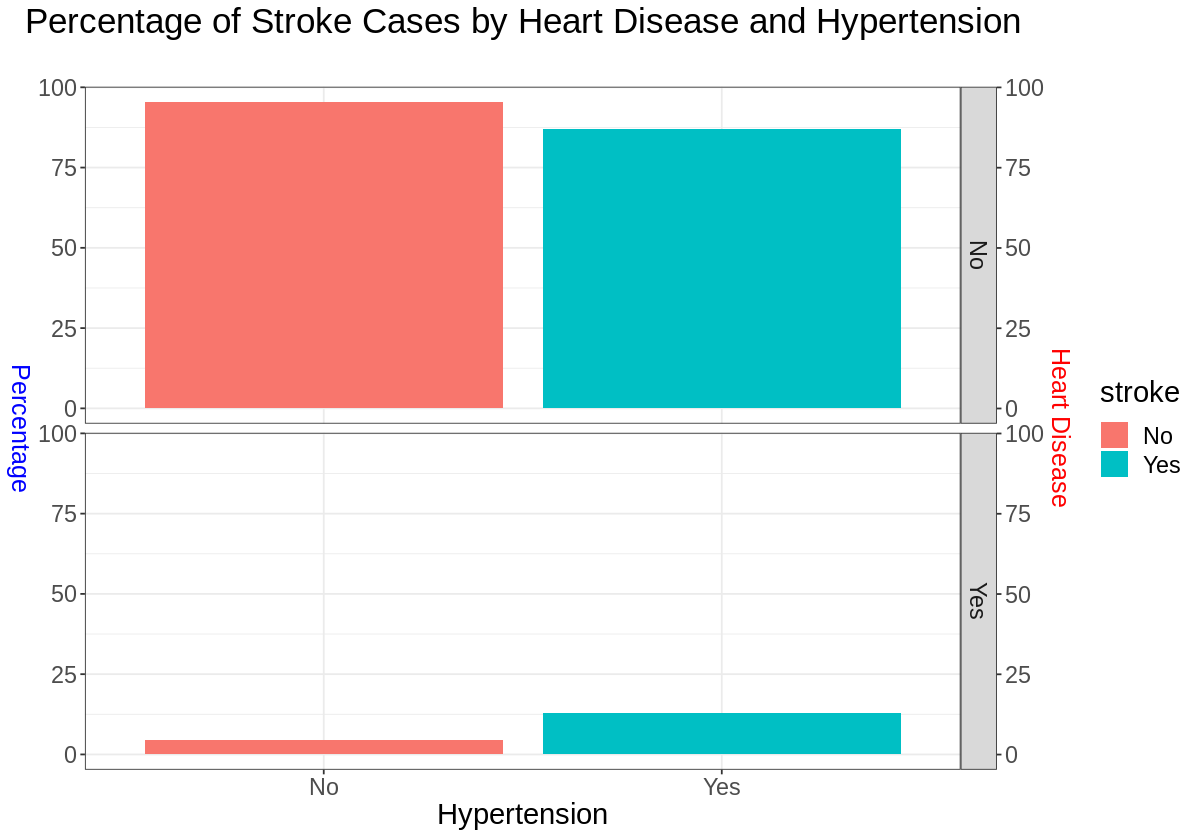

In [250]:
# Compute the percentage of stroke and heart disease cases by hypertension status

stroke_hypertension <- stroke %>%
  count(hypertension, stroke, heart_disease) %>%
  group_by(hypertension) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ungroup()

ggplot(stroke_hypertension, aes(x = hypertension, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Hypertension", y = "", title = "Percentage of Stroke Cases by Heart Disease and Hypertension\n") +
  facet_grid(heart_disease ~ .) +
  theme_bw() +
  theme(
    axis.title.y.right = element_text(color = "red", size = 15, angle = -90, vjust = 0.5),
    axis.title.y.left = element_text(color = "blue", size = 15, angle = -90, vjust = 0.5)
  ) +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))+
  scale_y_continuous(
    name = "Percentage",
    sec.axis = sec_axis(~ ., name = "Heart Disease")
  )


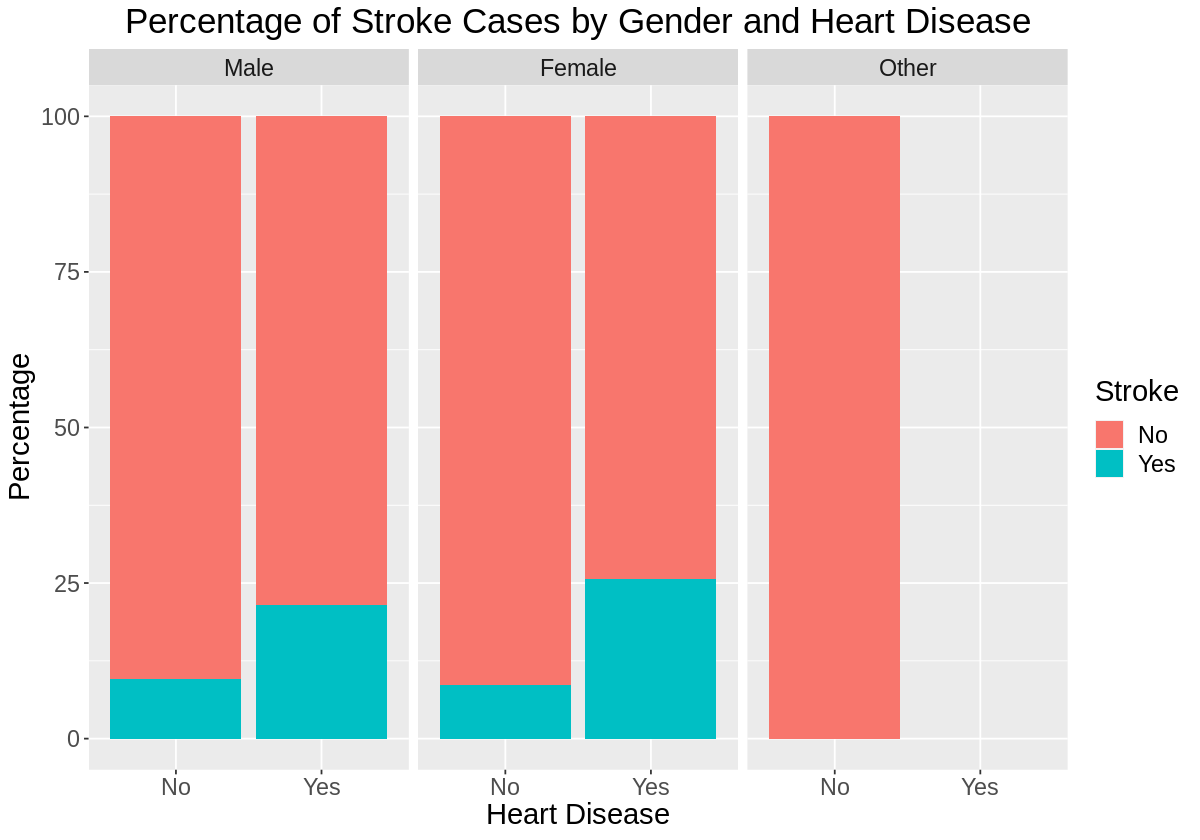

In [263]:
stroke_gender <- stroke %>%
  count(gender, heart_disease, stroke) %>%
  group_by(gender, heart_disease) %>%
  mutate(percentage = n / sum(n) * 100)

# Create the plot
stroke_gender_plot <- stroke_gender %>%
  ggplot(aes(x = heart_disease, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ gender) +
  labs(x = "Heart Disease", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Gender and Heart Disease") +
  theme(text = element_text(size = 17.5), plot.title = element_text(hjust = 0.5))

# Display the plot
print(stroke_gender_plot)

Warning message:
“Removed 201 rows containing missing values (geom_point).”


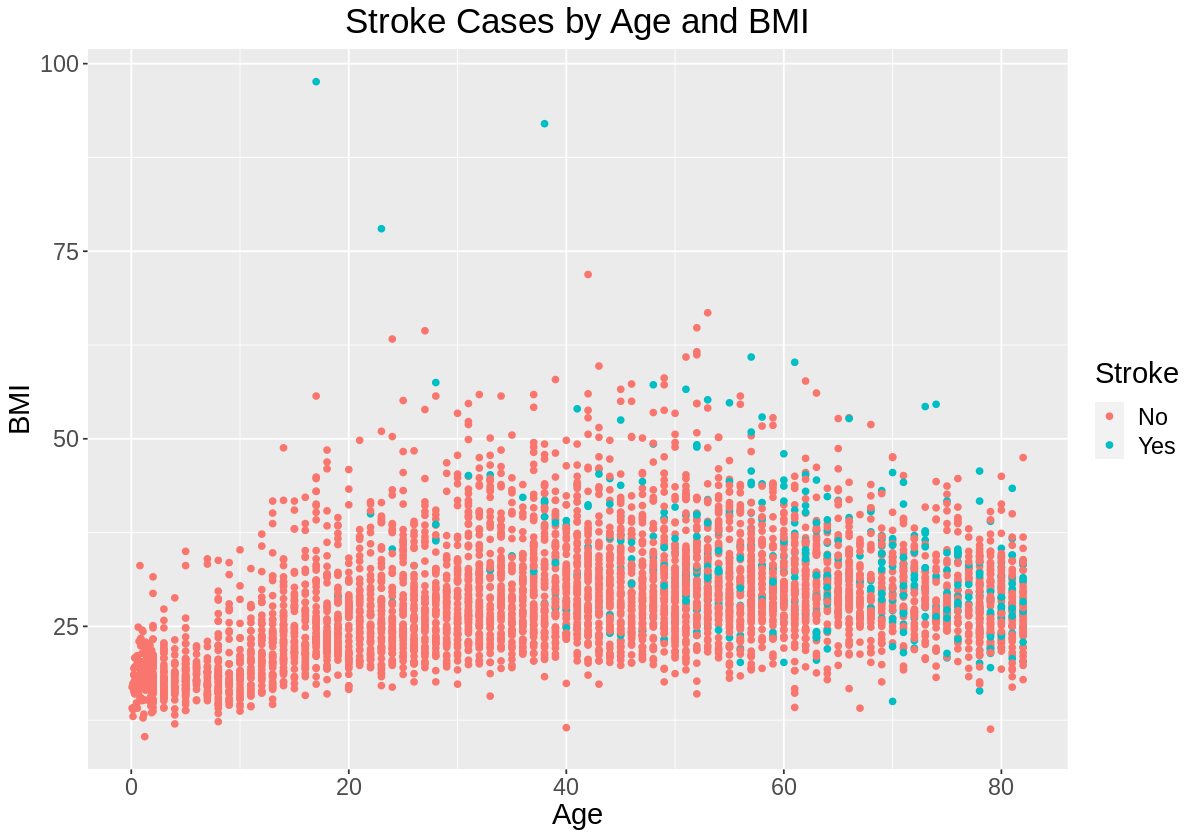

In [257]:
stroke_bmi <- stroke %>%
  ggplot(aes(x = age, y = bmi, colour = stroke)) +
  geom_point() +
  labs(x = "Age", y = "BMI", color = "Stroke", title = "Stroke Cases by Age and BMI") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))

stroke_bmi

Warning message:
“Removed 201 rows containing missing values (geom_point).”


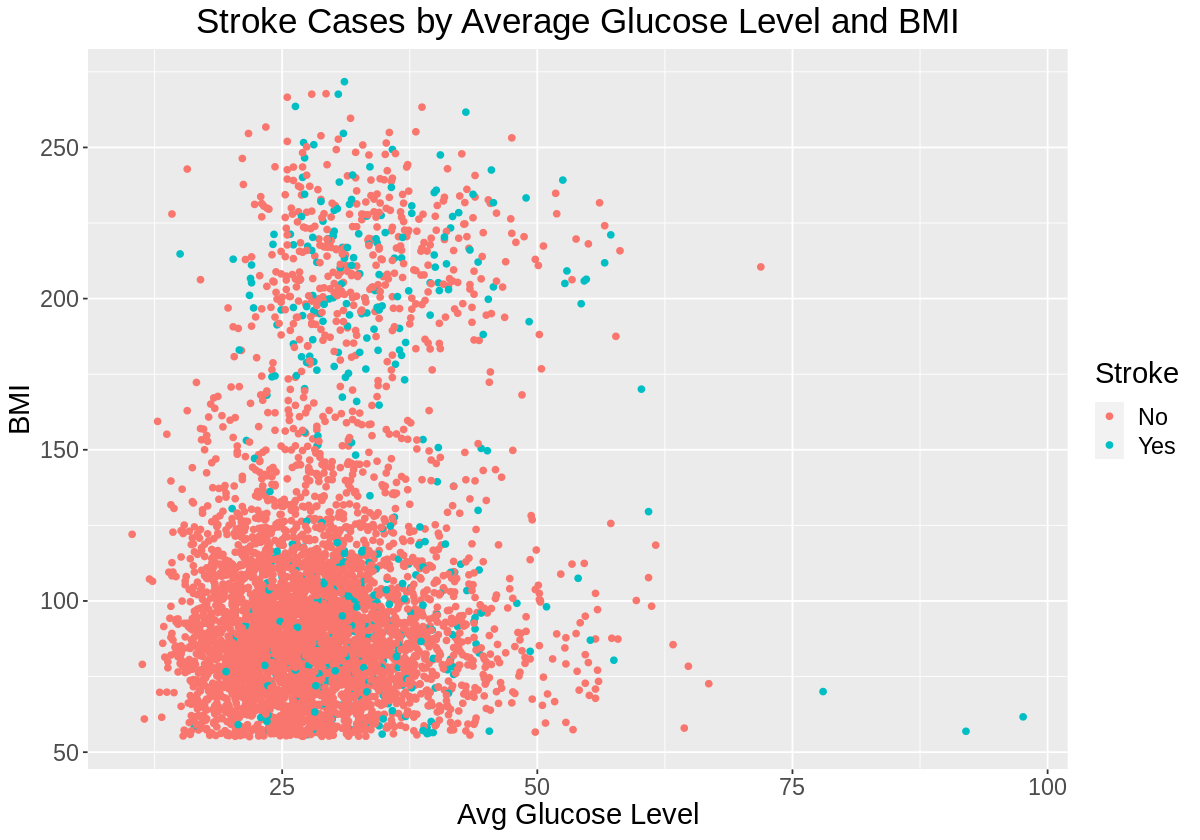

In [256]:
stroke_bmi <- stroke %>%
  ggplot(aes(x = bmi, y = avg_glucose_level, colour = stroke)) +
  geom_point() +
  labs(x = "Avg Glucose Level", y = "BMI", color = "Stroke", title = "Stroke Cases by Average Glucose Level and BMI") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))

stroke_bmi

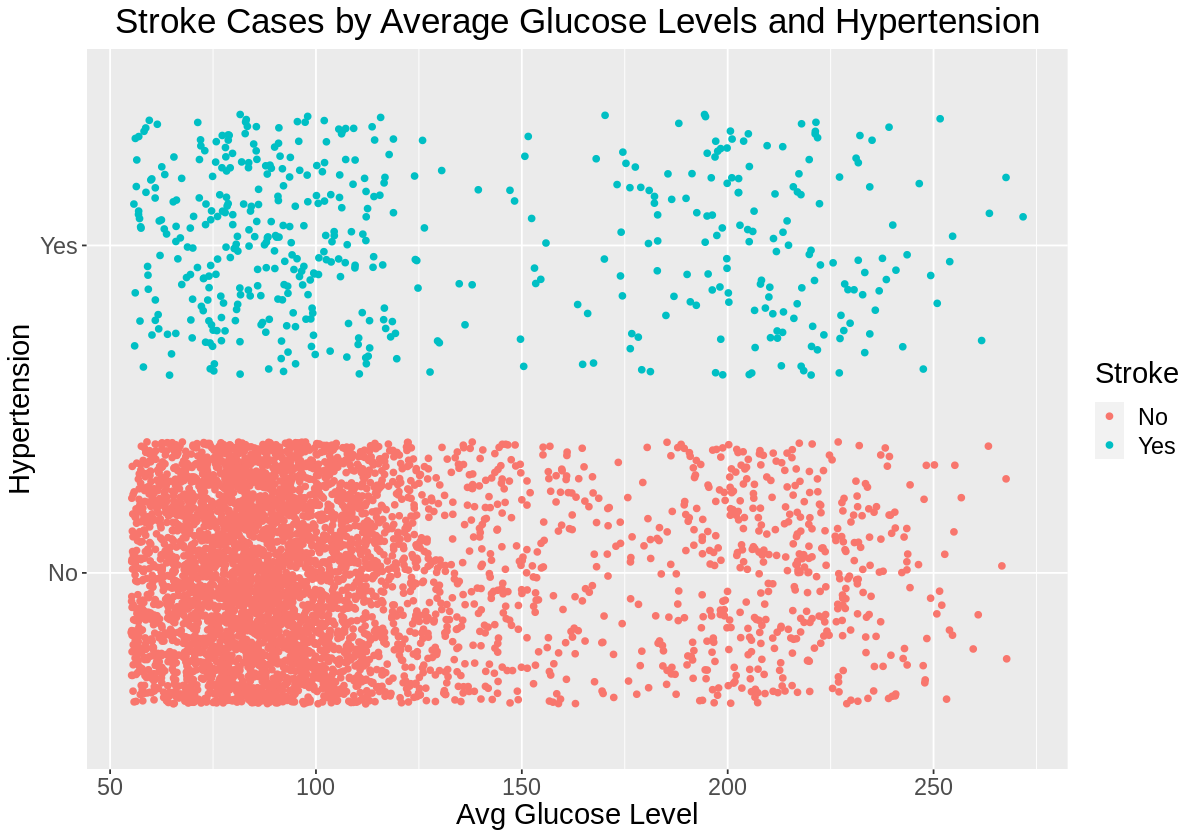

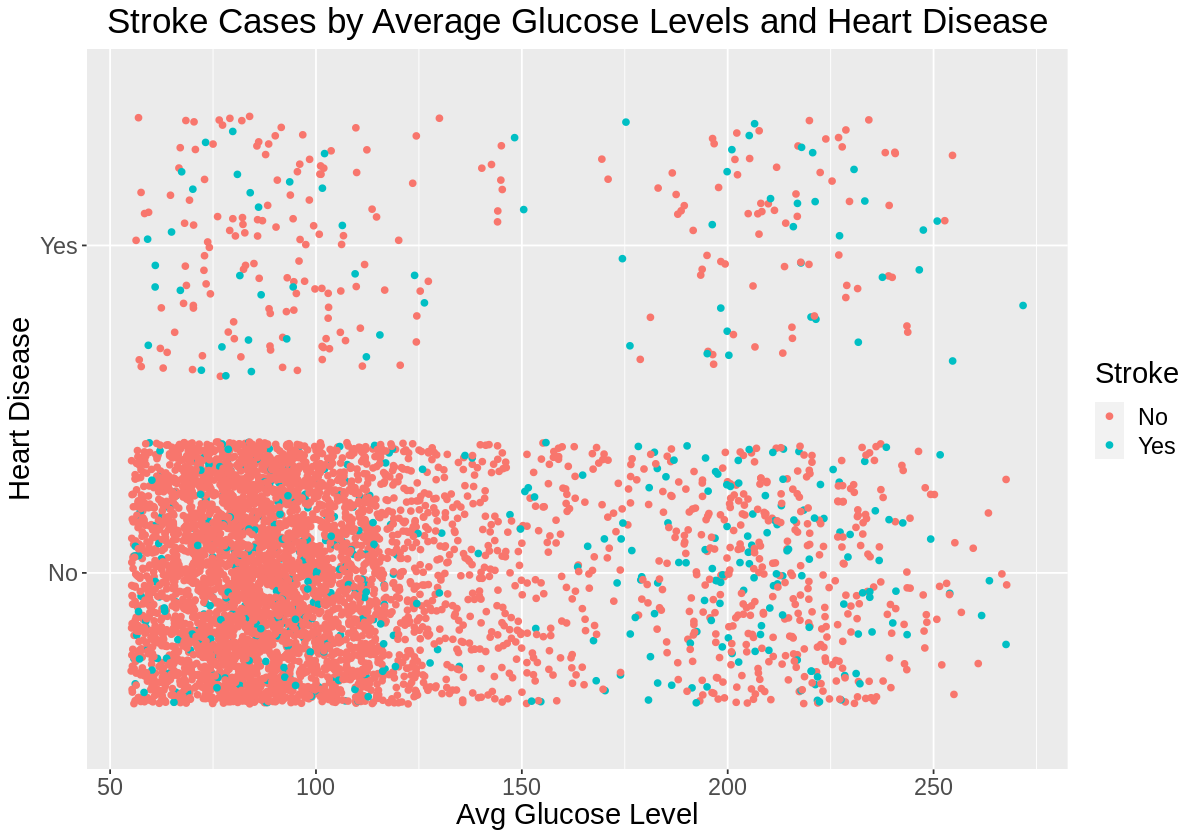

In [255]:
stroke_bmi <- stroke %>%
  ggplot(aes(x = avg_glucose_level, y = hypertension, colour = stroke)) +
  geom_jitter() +
  labs(x = "Avg Glucose Level", y = "Hypertension", color = "Stroke", title = "Stroke Cases by Average Glucose Levels and Hypertension") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))

stroke_bmi

stroke_bmi <- stroke %>%
  ggplot(aes(x = avg_glucose_level, y = heart_disease, colour = stroke)) +
  geom_jitter() +
  labs(x = "Avg Glucose Level", y = "Heart Disease", color = "Stroke", title = "Stroke Cases by Average Glucose Levels and Heart Disease") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))
stroke_bmi

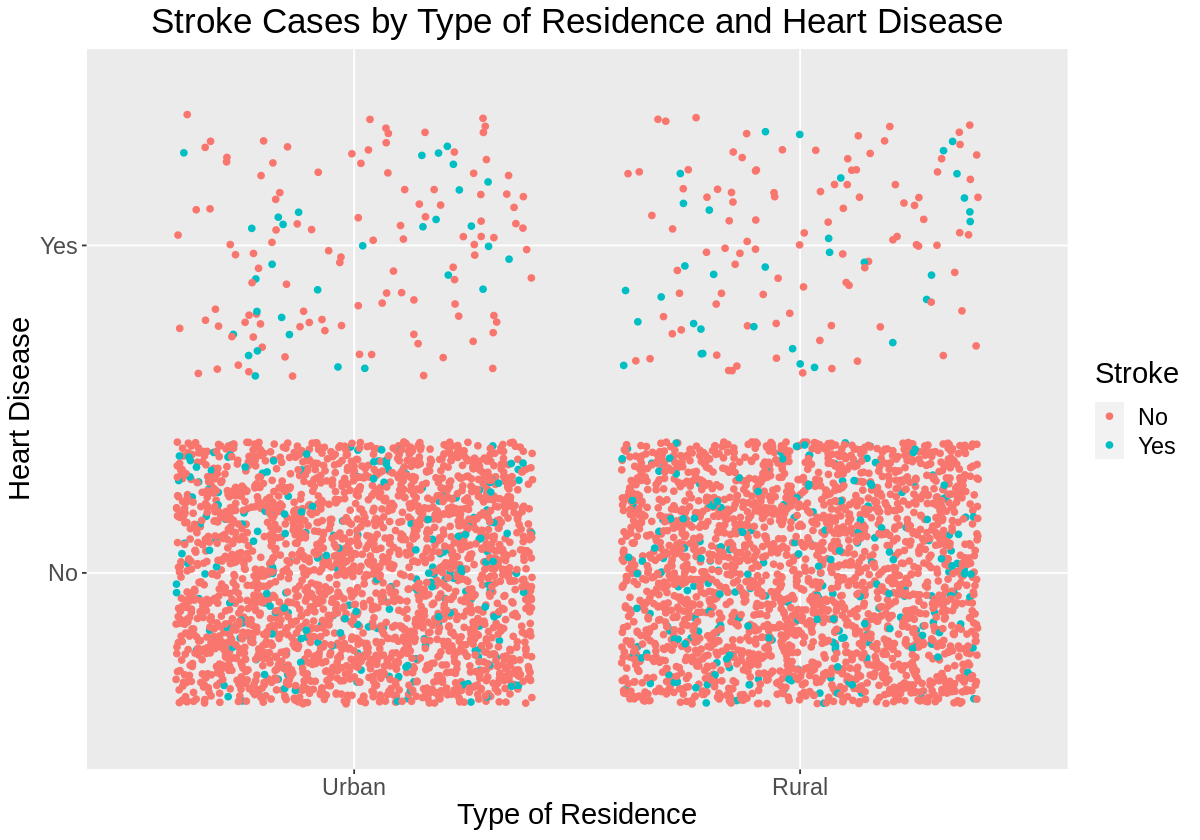

In [264]:
stroke_bmi <- stroke %>%
  ggplot(aes(x = residence_type, y = heart_disease, colour = stroke)) +
  geom_jitter() +
  labs(x = "Type of Residence", y = "Heart Disease", color = "Stroke", title = "Stroke Cases by Type of Residence and Heart Disease") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))

stroke_bmi

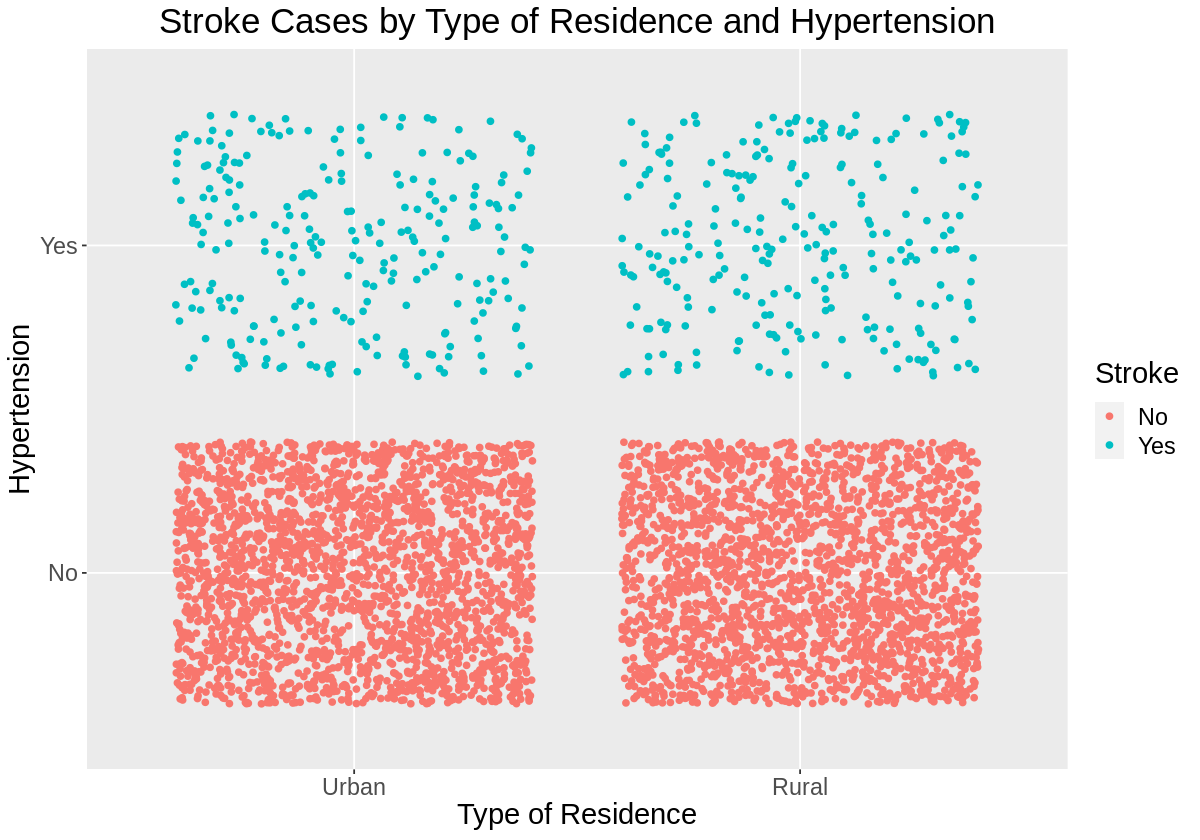

In [265]:

stroke_bmi <- stroke %>%
  ggplot(aes(x = residence_type, y = hypertension, colour = stroke)) +
  geom_jitter() +
  labs(x = "Type of Residence", y = "Hypertension", color = "Stroke", title = "Stroke Cases by Type of Residence and Hypertension") +
  theme(text = element_text(size = 17.5),
    plot.title = element_text(hjust = 0.5))

stroke_bmi

In [203]:
#Matthew testing different classifications

stroke <- stroke %>%
  select(bmi, avg_glucose_level, stroke) %>%
  drop_na() # Drop rows with missing values

# Split the data into training and testing sets
set.seed(123)
stroke_split <- initial_split(stroke, prop = 0.7)
stroke_train <- training(stroke_split)
stroke_test <- testing(stroke_split)

# Create a recipe for data preprocessing
stroke_recipe <- recipe(stroke ~ bmi + avg_glucose_level, data = stroke_train) %>%
  step_normalize(all_predictors()) %>%
  step_dummy(all_nominal()) %>%
  prep()

# Train a logistic regression model
stroke_logreg <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

# Train and evaluate the model
stroke_wf <- workflow() %>%
  add_recipe(stroke_recipe) %>%
  add_model(stroke_logreg)

stroke_wf_fit <- stroke_wf %>%
  fit(data = stroke_train)

stroke_wf_pred <- predict(stroke_wf_fit, new_data = stroke_test)

# Evaluate the model
stroke_wf_results <- stroke_wf_pred %>%
  bind_cols(stroke_test) %>%
  metrics(truth = stroke, estimate = .pred_class)

# View the model performance metrics
stroke_wf_results

ERROR: Error in eval_tidy(env$formula[[2]], env$data): object '.' not found
